# Bistable MEMS Switch Cell Assembly — FEM-Verified Springs

Switch cells using FEM-verified bistable spring geometry from the 4aa
verification notebook. Each cell uses `get_full_spring_polygon()` for the
exact fused beam shape (fillets + junction gussets), with the solid
simulation shuttle removed and replaced by the proof mass.

Four spring designs from the 4aa sandbox parameter sweeps:

| Design | anchor_dist | initial_offset | flex_ratio | rigid_width |
|--------|-------------|----------------|------------|-------------|
| A      | 100 µm      | 1.50 µm        | 0.45       | 1.00 µm     |
| B      | 120 µm      | 2.00 µm        | 0.45       | 1.20 µm     |
| C      | 120 µm      | 2.00 µm        | 0.45       | 1.00 µm     |
| D      | 100 µm      | 1.50 µm        | 0.20       | 1.50 µm     |

Key differences from earlier CCS spring pair cells:
- Spring geometry is the exact FEM-validated polygon (not reconstructed)
- Solid simulation shuttle is cut out; proof mass replaces it
- Top and bottom springs have the **same orientation** (no y-mirror)
- Proof mass extended ±10 µm so springs clear the comb drives

In [1]:
import sys
sys.path.insert(0, "../../libraries")

from mcw_custom_optical_mems_pdk import PDK
PDK.activate()

from mems_switch_cell_bistable import make_switch_mems_verified_bistable

## Design A: ad=100, h=1.50, fr=0.45, rw=1.00

Design A: switch_verified_bistable_ad100_h1.50_fr0.45_rw1.00  (108 x 144 um)


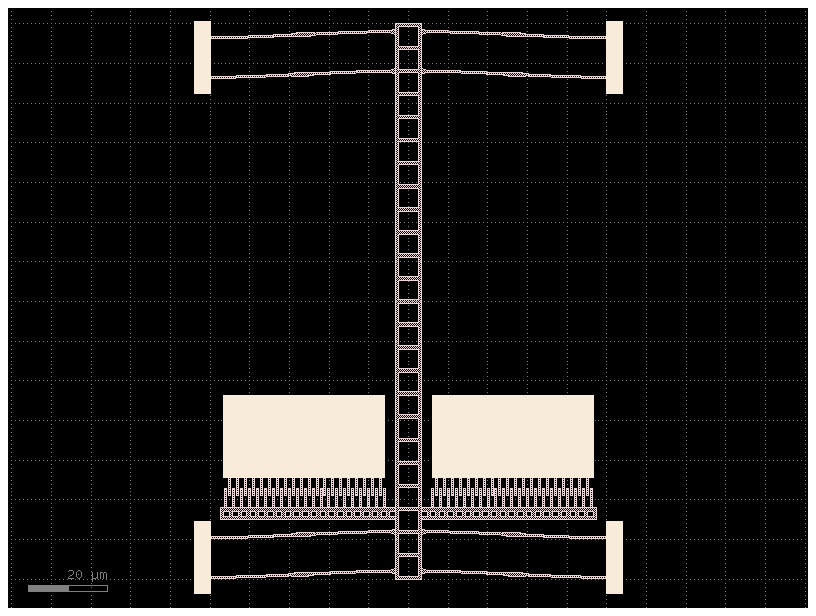

In [2]:
sw_a = make_switch_mems_verified_bistable(
    proof_length=7, proof_height=120,
    proof_height_extension=10,
    hole_diameter=5, hole_gap=0.8,
    spring_anchor_distance=100, spring_initial_offset=1.50,
    spring_flex_ratio=0.45, spring_rigid_width=1.00,
    finger_length=5, finger_width=0.5, finger_gap=0.5,
    finger_distance=3, num_pair=20,
    holder_width_move=3, holder_width_fixed=20,
    holder_gap_min=2, holder_top_over=0.3, holder_bottom_over=0.3,
    comb_edge_lower=5,
)
bb = sw_a.dbbox()
print(f"Design A: {sw_a.name}  ({bb.width():.0f} x {bb.height():.0f} um)")
sw_a.plot()

## Design B: ad=120, h=2.00, fr=0.45, rw=1.20

Design B: switch_verified_bistable_ad120_h2.00_fr0.45_rw1.20  (128 x 144 um)


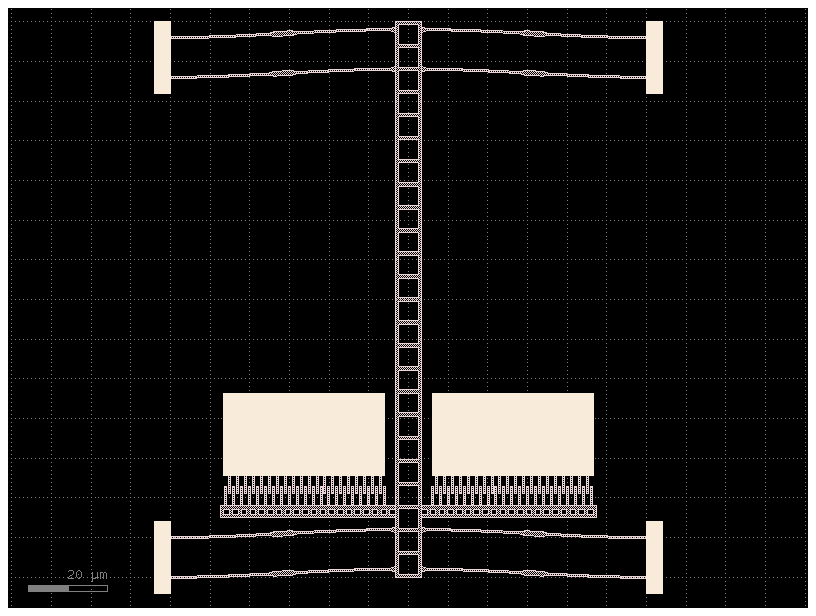

In [3]:
sw_b = make_switch_mems_verified_bistable(
    proof_length=7, proof_height=120,
    proof_height_extension=10,
    hole_diameter=5, hole_gap=0.8,
    spring_anchor_distance=120, spring_initial_offset=2.00,
    spring_flex_ratio=0.45, spring_rigid_width=1.20,
    finger_length=5, finger_width=0.5, finger_gap=0.5,
    finger_distance=3, num_pair=20,
    holder_width_move=3, holder_width_fixed=20,
    holder_gap_min=2, holder_top_over=0.3, holder_bottom_over=0.3,
    comb_edge_lower=5,
)
bb = sw_b.dbbox()
print(f"Design B: {sw_b.name}  ({bb.width():.0f} x {bb.height():.0f} um)")
sw_b.plot()

## Design C: ad=120, h=2.00, fr=0.45, rw=1.00

Design C: switch_verified_bistable_ad120_h2.00_fr0.45_rw1.00  (128 x 144 um)


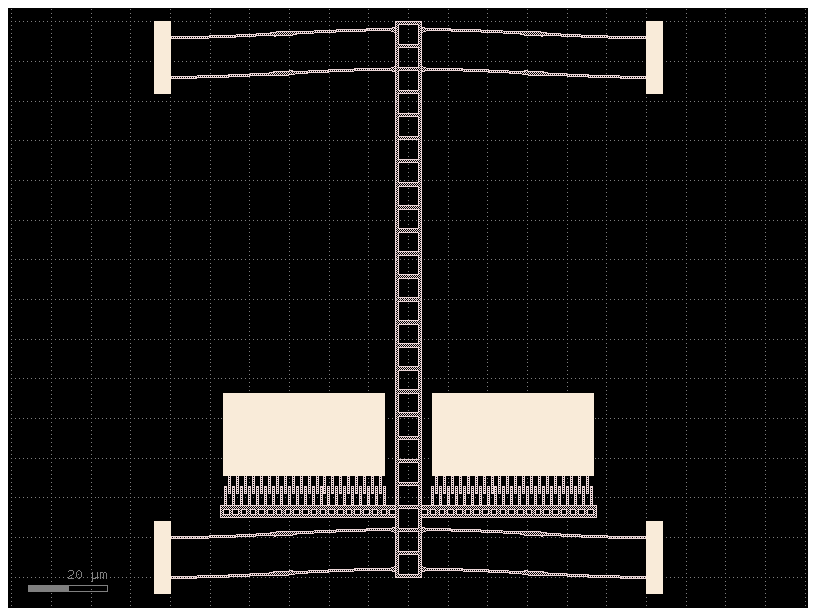

In [4]:
sw_c = make_switch_mems_verified_bistable(
    proof_length=7, proof_height=120,
    proof_height_extension=10,
    hole_diameter=5, hole_gap=0.8,
    spring_anchor_distance=120, spring_initial_offset=2.00,
    spring_flex_ratio=0.45, spring_rigid_width=1.00,
    finger_length=5, finger_width=0.5, finger_gap=0.5,
    finger_distance=3, num_pair=20,
    holder_width_move=3, holder_width_fixed=20,
    holder_gap_min=2, holder_top_over=0.3, holder_bottom_over=0.3,
    comb_edge_lower=5,
)
bb = sw_c.dbbox()
print(f"Design C: {sw_c.name}  ({bb.width():.0f} x {bb.height():.0f} um)")
sw_c.plot()

## Design D: ad=100, h=1.50, fr=0.20, rw=1.50

Design D: switch_verified_bistable_ad100_h1.50_fr0.20_rw1.50  (108 x 144 um)


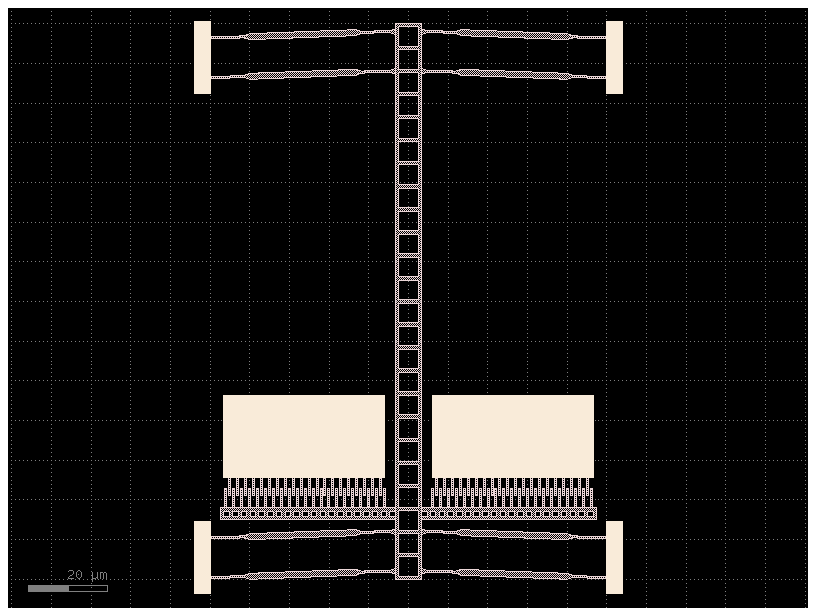

In [5]:
sw_d = make_switch_mems_verified_bistable(
    proof_length=7, proof_height=120,
    proof_height_extension=10,
    hole_diameter=5, hole_gap=0.8,
    spring_anchor_distance=100, spring_initial_offset=1.50,
    spring_flex_ratio=0.20, spring_rigid_width=1.50,
    finger_length=5, finger_width=0.5, finger_gap=0.5,
    finger_distance=3, num_pair=20,
    holder_width_move=3, holder_width_fixed=20,
    holder_gap_min=2, holder_top_over=0.3, holder_bottom_over=0.3,
    comb_edge_lower=5,
)
bb = sw_d.dbbox()
print(f"Design D: {sw_d.name}  ({bb.width():.0f} x {bb.height():.0f} um)")
sw_d.plot()

## GDS Export

Exported 4 switch cells to mems_switch_cell_bistable.gds
Total: 532 x 152 um


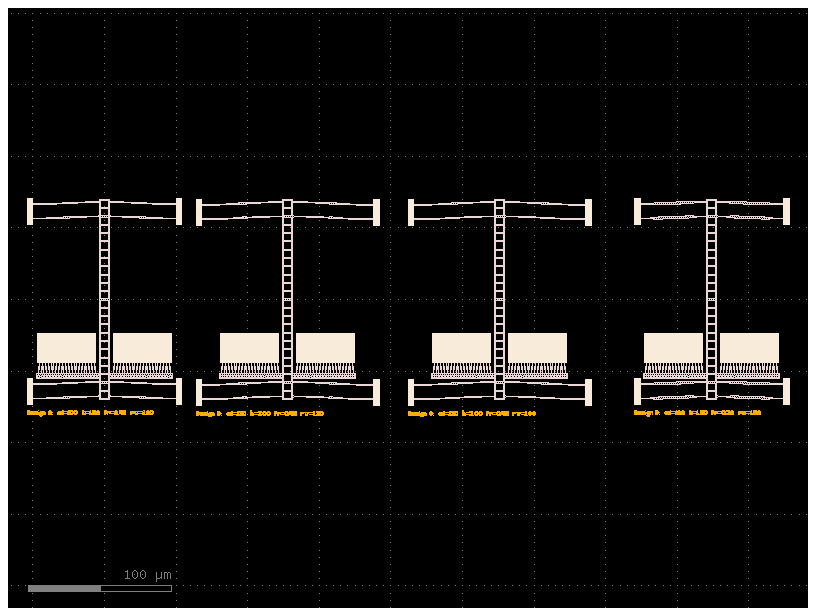

In [6]:
import gdsfactory as gf
import matplotlib.pyplot as plt

top = gf.Component("mems_switch_cell_bistable_verified")
spacing = 20  # um gap between cells

cells = [sw_a, sw_b, sw_c, sw_d]
designs = [
    {"label": "A", "ad": 100, "h": 1.50, "fr": 0.45, "rw": 1.00},
    {"label": "B", "ad": 120, "h": 2.00, "fr": 0.45, "rw": 1.20},
    {"label": "C", "ad": 120, "h": 2.00, "fr": 0.45, "rw": 1.00},
    {"label": "D", "ad": 100, "h": 1.50, "fr": 0.20, "rw": 1.50},
]

text_size = 3.0  # um
text_gap = 4.0   # um below cell bottom edge

x_offset = 0
for cell, d in zip(cells, designs):
    ref = top.add_ref(cell)
    ref.dmovex(x_offset)

    # Parameter label beneath the structure
    bb = ref.dbbox()
    label_str = (f"Design {d['label']}:  "
                 f"ad={d['ad']}  h={d['h']:.2f}  "
                 f"fr={d['fr']:.2f}  rw={d['rw']:.2f}")
    txt = gf.components.text(label_str, size=text_size, layer=(100, 0))
    txt_ref = top.add_ref(txt)
    txt_ref.dmovex(bb.left)
    txt_ref.dmovey(bb.bottom - text_gap - text_size)

    x_offset += cell.dbbox().width() + spacing

gds_path = "mems_switch_cell_bistable.gds"
top.write_gds(gds_path)
bb = top.dbbox()
print(f"Exported {len(cells)} switch cells to {gds_path}")
print(f"Total: {bb.width():.0f} x {bb.height():.0f} um")

plt.rcParams['figure.figsize'] = (192, 108)
plt.rcParams['figure.dpi'] = 600
top.plot()